# tips

In [1]:
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df = sns.load_dataset('tips')

In [3]:
print(type(df))

<class 'pandas.core.frame.DataFrame'>


In [4]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [5]:
df.tail()

,total_bill,tip,sex,smoker,day,time,size
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


In [6]:
print(df.shape)

(244, 7)


In [7]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null category
smoker        244 non-null category
day           244 non-null category
time          244 non-null category
size          244 non-null int64
dtypes: category(4), float64(2), int64(1)
memory usage: 7.2 KB


In [9]:
df.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [10]:
df.dropna(inplace=True)

In [11]:
df.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

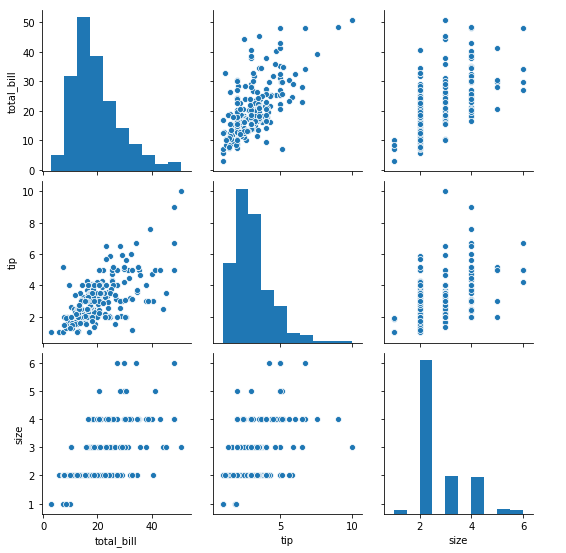

In [12]:
sns.pairplot(df)

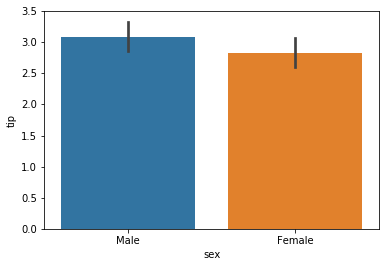

In [13]:
sns.barplot(x='sex', y='tip', data=df)

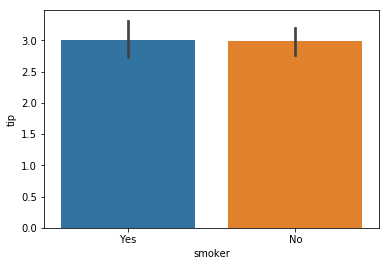

In [14]:
sns.barplot(x='smoker', y='tip', data=df)

In [15]:
groupedvalues = df.groupby('day').sum().reset_index()
groupedvalues.head()

,day,total_bill,tip,size
0,Thur,1096.33,171.83,152
1,Fri,325.88,51.96,40
2,Sat,1778.40,260.40,219
3,Sun,1627.16,247.39,216


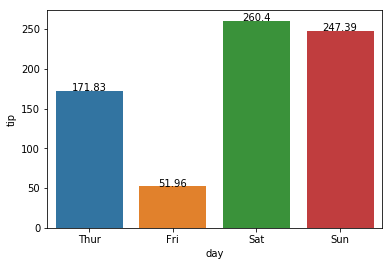

In [16]:
g =sns.barplot(x='day',y='tip',data=groupedvalues)

for index, row in groupedvalues.iterrows():
    g.text(row.name, row.tip, round(row.tip, 2), color='black', ha="center")

In [17]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244 entries, 0 to 243
Data columns (total 7 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null category
smoker        244 non-null category
day           244 non-null category
time          244 non-null category
size          244 non-null int64
dtypes: category(4), float64(2), int64(1)
memory usage: 19.0 KB


In [19]:
print(df.sex.unique())
print(df.smoker.unique())
print(df.day.unique())
print(df.time.unique())

[Female, Male]
Categories (2, object): [Female, Male]
[No, Yes]
Categories (2, object): [No, Yes]
[Sun, Sat, Thur, Fri]
Categories (4, object): [Sun, Sat, Thur, Fri]
[Dinner, Lunch]
Categories (2, object): [Dinner, Lunch]


In [20]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

dfi = df.copy()

dfi['sex'] = label_encoder.fit_transform(dfi['sex'])
print(label_encoder.classes_)
dfi['smoker'] = label_encoder.fit_transform(dfi['smoker'])
print(label_encoder.classes_)
dfi['day'] = label_encoder.fit_transform(dfi['day'])
print(label_encoder.classes_)
dfi['time'] = label_encoder.fit_transform(dfi['time'])
print(label_encoder.classes_)

['Female' 'Male']
['No' 'Yes']
['Fri' 'Sat' 'Sun' 'Thur']
['Dinner' 'Lunch']


In [21]:
dfi.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,0,0,2,0,2
1,10.34,1.66,1,0,2,0,3
2,21.01,3.50,1,0,2,0,3
3,23.68,3.31,1,0,2,0,2
4,24.59,3.61,0,0,2,0,4


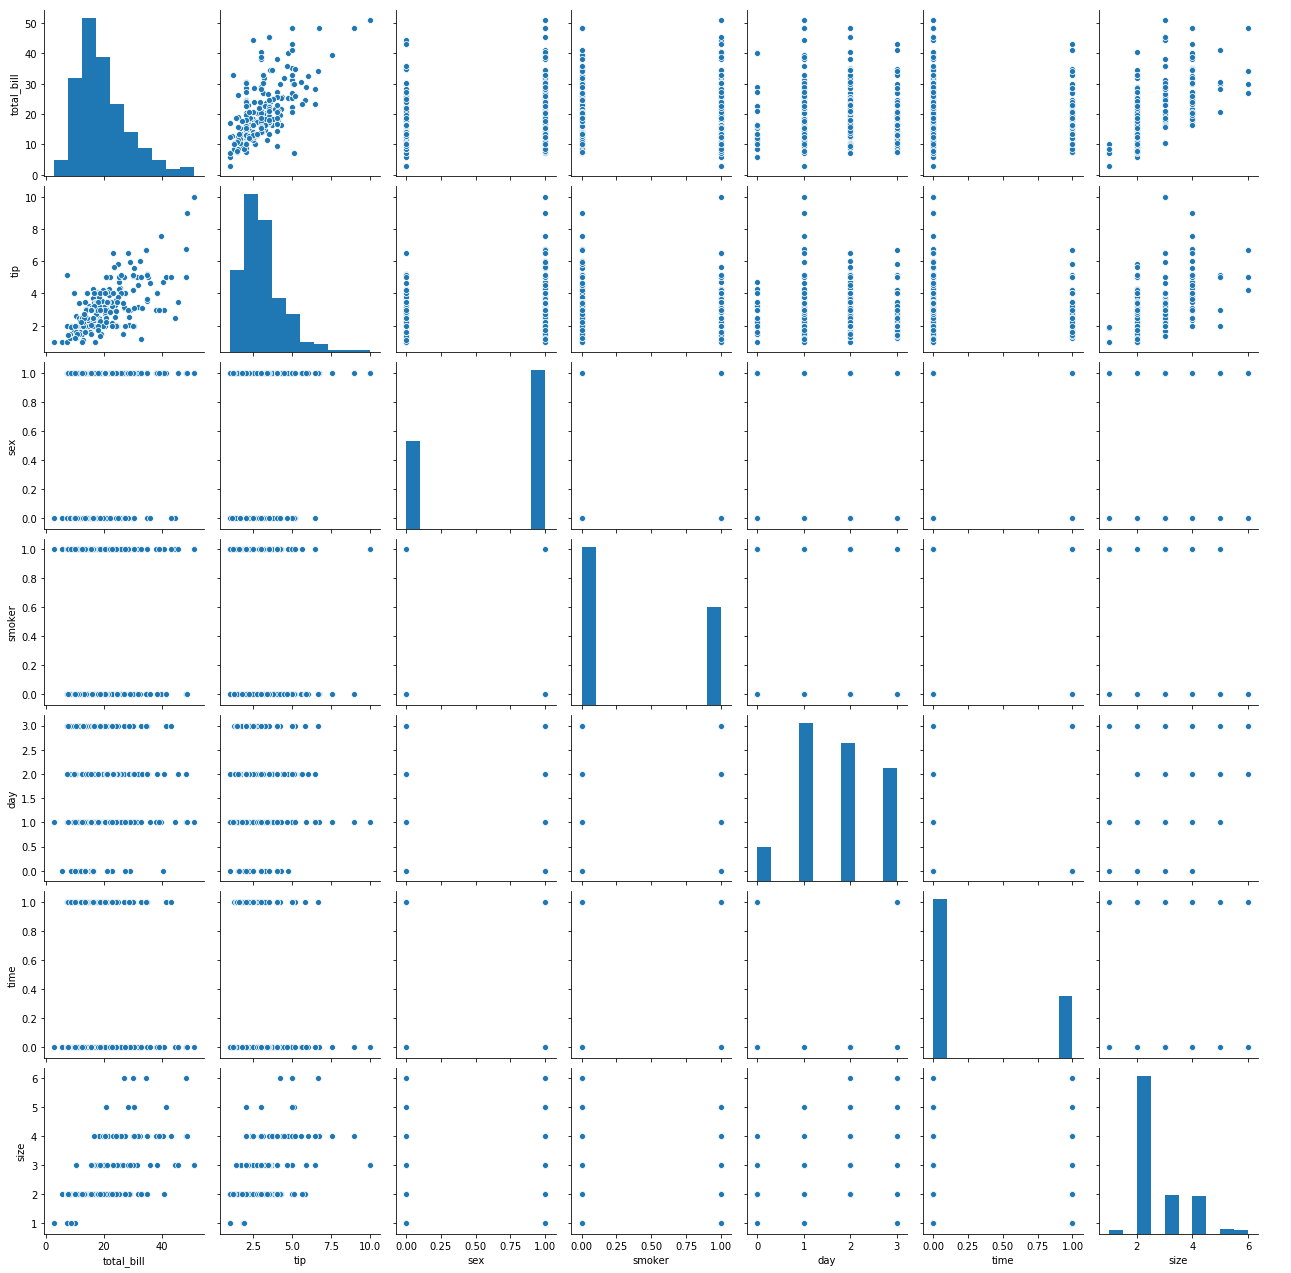

In [22]:
sns.pairplot(dfi)

In [23]:
y_train = dfi[['tip']].values
dfi.drop('tip', axis=1, inplace=True)
X_train = dfi.values

In [24]:
print(X_train[:5])

[[16.99  0.    0.    2.    0.    2.  ]
 [10.34  1.    0.    2.    0.    3.  ]
 [21.01  1.    0.    2.    0.    3.  ]
 [23.68  1.    0.    2.    0.    2.  ]
 [24.59  0.    0.    2.    0.    4.  ]]


In [25]:
print(y_train[:5])

[[1.01]
 [1.66]
 [3.5 ]
 [3.31]
 [3.61]]


In [26]:
from sklearn import tree

In [27]:
model = tree.DecisionTreeRegressor()

In [28]:
model.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [29]:
y = model.predict(X_train)

In [30]:
print(y.shape)
print(y_train.shape)

(244,)
(244, 1)


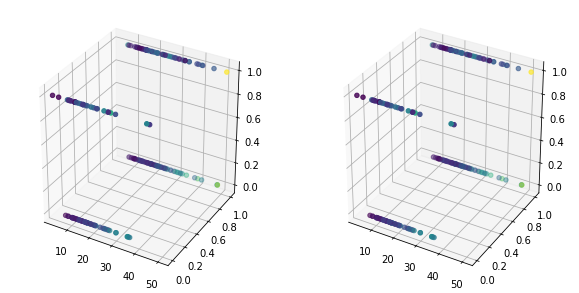

In [31]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d, Axes3D 

fig, axs = plt.subplots(ncols=2, figsize=(10, 5), subplot_kw={"projection":"3d"})
for ax, data in zip(axs, [y, y_train.reshape(-1)]):
    ax.scatter(X_train[:,0], X_train[:,1],X_train[:,2], c=data)
plt.show()

In [32]:
print(model.score(X_train, y_train))

1.0
